# Top 12 sellers for 2019 Summer Menswear (by weekly)


Best selling items EDA on Kaggle: https://www.kaggle.com/negoto/best-selling-items-catalog-like-eda-of-articles

In [1]:
import pandas as pd
import numpy as np
import collaborative_filter as cf
import matplotlib.pyplot as plt

In [2]:
##read 2019 567 Menswear transaction data 
transaction_men_raw = pd.read_csv("../data/large_data/transaction_2019_567_Menswear.csv")
transaction_men_raw

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,60,2019-05-01,00357b192b81fc83261a45be87f5f3d59112db7d117513...,743719001,0.050831,2,2019,5,18,743719,...,Shoes,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Cotton canvas trainers with a padded edge and ...
1,140,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,507431031,0.015237,2,2019,5,18,507431,...,Jersey inactive from s1,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in hard-washed slub cotton jersey with...
2,141,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,378447036,0.054220,2,2019,5,18,378447,...,Knitwear,F,Menswear,3,Menswear,23,Men Suits & Tailoring,1003,Knitwear,Jumper in fine-knit merino wool with a V-neck ...
3,142,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,657850001,0.030492,2,2019,5,18,657850,...,Knitwear,F,Menswear,3,Menswear,20,Contemporary Smart,1003,Knitwear,Jumper in a textured-knit wool blend with long...
4,143,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,598755015,0.013542,2,2019,5,18,598755,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,"Long, round-necked T-shirt in soft jersey with..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286342,5273975,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286343,5273976,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286344,5273978,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,663793009,0.022864,1,2019,7,31,663793,...,Underwear Jersey,F,Menswear,3,Menswear,26,Men Underwear,1017,"Under-, Nightwear",Briefs in stretch cotton jersey with flatlock ...
286345,5273979,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,501619019,0.022864,1,2019,7,31,501619,...,Shirt,F,Menswear,3,Menswear,20,Contemporary Smart,1011,Shirts,Shirt in an airy cotton weave with a turn-down...


In [3]:
for wk in range(18,31):
    
    mask_train = transaction_men_raw.week == wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    print(wk, len(X_train), len(X_test))

18 16320 13170
19 13170 16647
20 16647 18696
21 18696 22464
22 22464 17315
23 17315 16619
24 16619 29118
25 29118 33027
26 33027 25914
27 25914 21961
28 21961 20902
29 20902 25956
30 25956 8238


In [4]:
AOP_results = []
MAP_results = []
num_users = []
timeline = []

# week 18 - 31
for wk in range(18,31):
    
    #mask_train = transaction_men_raw.week == wk
    mask_train = transaction_men_raw.week <= wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    #print(wk, len(X_train), len(X_test))
    
    #find out top 12 selling items in training data
    top12items = list(X_train.article_id.value_counts()[0:12].index)
        
    #save top 12 selling items for users in a dict
    #to all users in test sets
    all_unique_users_in_test = X_test.customer_id.unique()
    top12_items = {}
    for user in all_unique_users_in_test:
        top12_items[user] = top12items

    #calculate AOP@12 for each train-test group
    AOP12_top, num_user = cf.AOP(top12_items, X_test)
    AOP_results.append(AOP12_top)

    #calculate MAP@12 for each train-test group
    MAP12_top, num_user = cf.MAP(top12_items, X_test)
    MAP_results.append(MAP12_top)

    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))

  4%|███▏                                                                         | 212/5098 [00:00<00:04, 1051.16it/s]

Number of users: 5098


  3%|██▍                                                                           | 196/6158 [00:00<00:06, 909.79it/s]

Number of users: 5098


  1%|█▏                                                                             | 90/6158 [00:00<00:06, 884.63it/s]

Number of users: 6158


  2%|█▉                                                                            | 168/6984 [00:00<00:08, 837.49it/s]

Number of users: 6158


  1%|▉                                                                              | 78/6984 [00:00<00:08, 773.10it/s]

Number of users: 6984


  1%|▌                                                                              | 62/8212 [00:00<00:13, 615.70it/s]

Number of users: 6984


  1%|▋                                                                              | 70/8212 [00:00<00:11, 694.85it/s]

Number of users: 8212


  2%|█▏                                                                             | 97/6289 [00:00<00:07, 878.76it/s]

Number of users: 8212


  1%|█                                                                              | 86/6289 [00:00<00:07, 853.45it/s]

Number of users: 6289


  1%|█▏                                                                             | 92/6336 [00:00<00:06, 913.33it/s]

Number of users: 6289


  2%|█▎                                                                            | 103/6336 [00:00<00:06, 902.42it/s]

Number of users: 6336


  1%|▍                                                                              | 52/9897 [00:00<00:19, 511.91it/s]

Number of users: 6336


  1%|▍                                                                              | 59/9897 [00:00<00:16, 585.66it/s]

Number of users: 9897


  0%|▎                                                                             | 53/11093 [00:00<00:21, 519.75it/s]

Number of users: 9897


  0%|▍                                                                             | 54/11093 [00:00<00:20, 532.29it/s]

Number of users: 11093


  1%|█▏                                                                            | 137/9243 [00:00<00:13, 656.31it/s]

Number of users: 11093


  1%|█                                                                             | 132/9243 [00:00<00:13, 655.63it/s]

Number of users: 9243


  1%|▊                                                                              | 84/8023 [00:00<00:10, 741.38it/s]

Number of users: 9243


  2%|█▍                                                                            | 150/8023 [00:00<00:10, 746.44it/s]

Number of users: 8023


  1%|▊                                                                              | 79/7527 [00:00<00:10, 695.59it/s]

Number of users: 8023


  2%|█▊                                                                            | 173/7527 [00:00<00:09, 782.03it/s]

Number of users: 7527


  1%|▌                                                                              | 67/8844 [00:00<00:13, 658.55it/s]

Number of users: 7527


  1%|▌                                                                              | 67/8844 [00:00<00:13, 665.11it/s]

Number of users: 8844


  4%|███▍                                                                         | 139/3138 [00:00<00:02, 1381.41it/s]

Number of users: 8844


  5%|███▍                                                                         | 142/3138 [00:00<00:02, 1370.73it/s]

Number of users: 3138


100%|████████████████████████████████████████████████████████████████████████████| 3138/3138 [00:02<00:00, 1352.00it/s]

Number of users: 3138


In [5]:
print(AOP_results)
print(MAP_results)
print(num_users)
print(timeline)

[0.011605858506603966, 0.008187181985493173, 0.008280832378770581, 0.009092385127455761, 0.009619971378597618, 0.008193918350168401, 0.00837795965107269, 0.009044742930977406, 0.00868224602401816, 0.007551206946694983, 0.0074066693237678245, 0.007594602743856529, 0.006107924367962608]
[0.01365492833960854, 0.007533935607173649, 0.008424321557912605, 0.00967806376278737, 0.012012525725953923, 0.010151695545674352, 0.009894954345292861, 0.011117545842147044, 0.010425920904120681, 0.008901520397376033, 0.008599390518647824, 0.008222499338651525, 0.007072021468133643]
[5098, 6158, 6984, 8212, 6289, 6336, 9897, 11093, 9243, 8023, 7527, 8844, 3138]
['Wk_19', 'Wk_20', 'Wk_21', 'Wk_22', 'Wk_23', 'Wk_24', 'Wk_25', 'Wk_26', 'Wk_27', 'Wk_28', 'Wk_29', 'Wk_30', 'Wk_31']


In [7]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
#result_df.to_csv("../data/MenswearResults/topSell_allTestUsers.csv")
result_df.to_csv("../data/MenswearResults/topSell_allTestUsers_accum.csv")

result_df.head()

,timeline,AOP,MAP,num_users
0,Wk_19,0.011606,0.013655,5098
1,Wk_20,0.008187,0.007534,6158
2,Wk_21,0.008281,0.008424,6984
3,Wk_22,0.009092,0.009678,8212
4,Wk_23,0.009620,0.012013,6289


In [8]:
## Read result csv file
#topSell_df = pd.read_csv("../data/MenswearResults/topSell_allTestUsers.csv").iloc[:,1:]
topSell_df = pd.read_csv("../data/MenswearResults/topSell_allTestUsers_accum.csv").iloc[:,1:]
topSell_df

,timeline,AOP,MAP,num_users
0,Wk_19,0.011606,0.013655,5098
1,Wk_20,0.008187,0.007534,6158
2,Wk_21,0.008281,0.008424,6984
3,Wk_22,0.009092,0.009678,8212
4,Wk_23,0.009620,0.012013,6289
5,Wk_24,0.008194,0.010152,6336
6,Wk_25,0.008378,0.009895,9897
7,Wk_26,0.009045,0.011118,11093
8,Wk_27,0.008682,0.010426,9243
9,Wk_28,0.007551,0.008902,8023


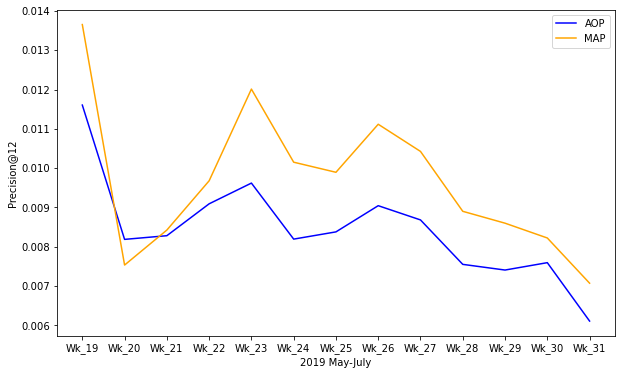

In [9]:
#plot for AOP MAP
plt.figure(figsize=(10,6))
plt.plot(topSell_df.timeline, topSell_df.AOP, color= 'blue')
plt.plot(topSell_df.timeline, topSell_df.MAP, color= 'orange')
plt.xlabel('2019 May-July')
plt.ylabel('Precision@12')
plt.legend(['AOP','MAP'])

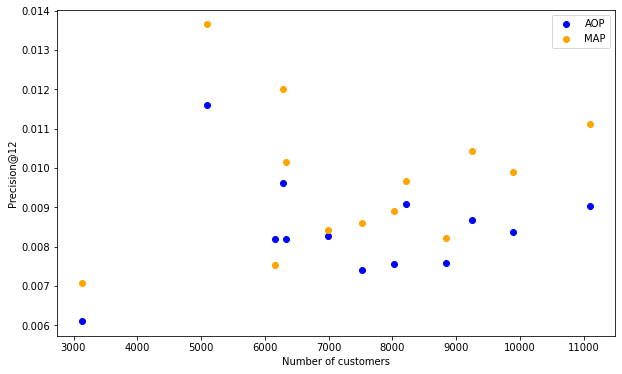

In [10]:
#scatter plot for AOP and number of users
plt.figure(figsize=(10,6))
plt.scatter(topSell_df.num_users, topSell_df.AOP, color = 'blue')
plt.scatter(topSell_df.num_users, topSell_df.MAP, color = 'orange')
plt.xlabel('Number of customers')
plt.ylabel('Precision@12')
plt.legend(['AOP','MAP'])